# Ornus Capital Project 1 by Jaspreet Kang

In [26]:
# %load crypto_extract.py
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

    
### Testing function: function for one coin that returns just pct change
def test_coin(beg_date, end_date, coin_name):
    url = "https://coinmarketcap.com/currencies/" + str(coin_name) + "/historical-data/?start=" + str(beg_date) + "&end=" + str(end_date)
    content = requests.get(url).content
    soup = BeautifulSoup(content,'html.parser')
    table = soup.find('table', {'class': 'table'})
    
    data = [[td.text.strip() for td in tr.findChildren('td')] 
            for tr in table.findChildren('tr')]
    df = pd.DataFrame(data)
    df.drop(df.index[0], inplace=True) # first row is empty
    df[0] =  pd.to_datetime(df[0]) # date
    for i in range(1,7):
        df[i] = pd.to_numeric(df[i].str.replace(",","").str.replace("-","")) # some vol is missing and has -
    df.columns = ['Date','Open','High','Low','Close','Volume','Market Cap']
    df.set_index('Date',inplace=True)
    df.sort_index(inplace=True)
    df['Price'] = (df['Open'] + df['Close']) / 2
    df[str(coin_name) + '%'] = df['Price'].pct_change()
    df_pct = pd.DataFrame(df[str(coin_name) + '%'])
    return df_pct

#### everything function: function that inputs beginning date, end date, and x number of
    #### coins you'd like to inspect. Calling function will spit out graphs and important 
    #### information
def everything1(date1, date2, arg, *args):
    d = test_coin(date1, date2, arg)
    for coin in args:
        df = test_coin(date1, date2, coin)
        d = pd.concat([d, df], axis=1, join='inner')
    if (len(d.columns) == 2):
        corr = d.corr()
        print(corr); print(corr**2)
        model = smf.ols('d[d.columns[1]] ~ d[d.columns[0]]', data=d, missing='drop').fit()
        print(model.summary())
        #d_norm = d.divide(d.ix[1])# a lot of coins have different starting dates. thats why we index 2 row instead of 1st
        plt.ion(); plt.figure()
        #d_norm.plot(figsize = (15,10))
        d.plot(figsize = (15,10))
        plt.pause(1); plt.figure(figsize = (10, 10))
        sns.regplot(x=d[d.columns[0]], y=d[d.columns[1]], data=d)
        plt.ioff(); plt.show()
    else:
        corr = d.corr()
        print(corr); print(corr**2)
        d_norm = d.divide(d.ix[1])
        plt.ion(); plt.figure()
        d_norm.plot(figsize = (15, 10))
        plt.pause(1)
        plt.figure(figsize=(10,10))
        sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
        plt.ioff(); plt.show()

In [9]:
from crypto_extract import everything1

# Ethereum ~ Bitcoin (Year to Date)

           bitcoin%  ethereum%
bitcoin%   1.000000   0.859784
ethereum%  0.859784   1.000000
           bitcoin%  ethereum%
bitcoin%   1.000000   0.739229
ethereum%  0.739229   1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     306.2
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.67e-33
Time:                        16:49:25   Log-Likelihood:                 313.07
No. Observations:                 110   AIC:                            -622.1
Df Residuals:                     108   BIC:                            -616.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      co

<Figure size 432x288 with 0 Axes>

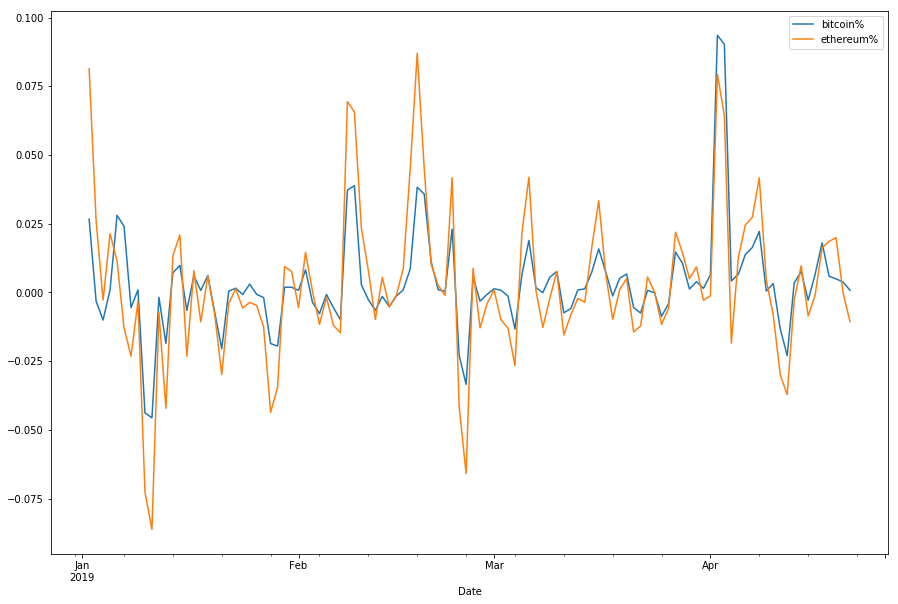

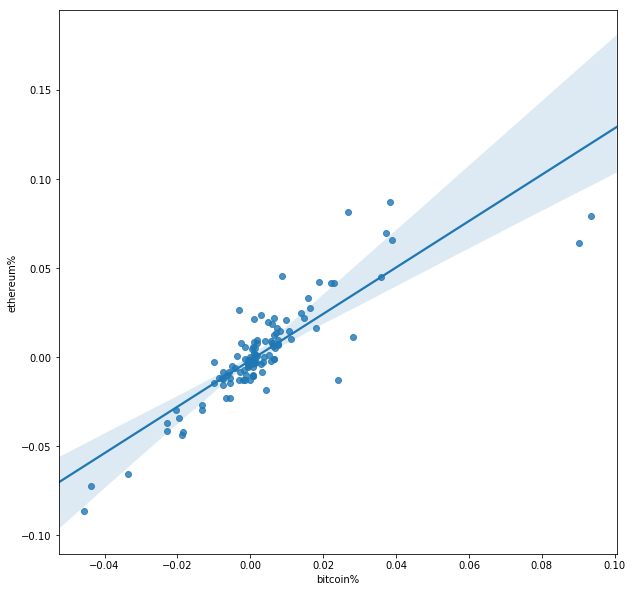

In [27]:
everything1(20190101, 20190421, "bitcoin", "ethereum")

# Ethereum ~ Bitcoin (1 Year)

           bitcoin%  ethereum%
bitcoin%   1.000000   0.842086
ethereum%  0.842086   1.000000
           bitcoin%  ethereum%
bitcoin%   1.000000   0.709109
ethereum%  0.709109   1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     884.9
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.31e-99
Time:                        16:49:35   Log-Likelihood:                 948.62
No. Observations:                 365   AIC:                            -1893.
Df Residuals:                     363   BIC:                            -1885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      co

<Figure size 432x288 with 0 Axes>

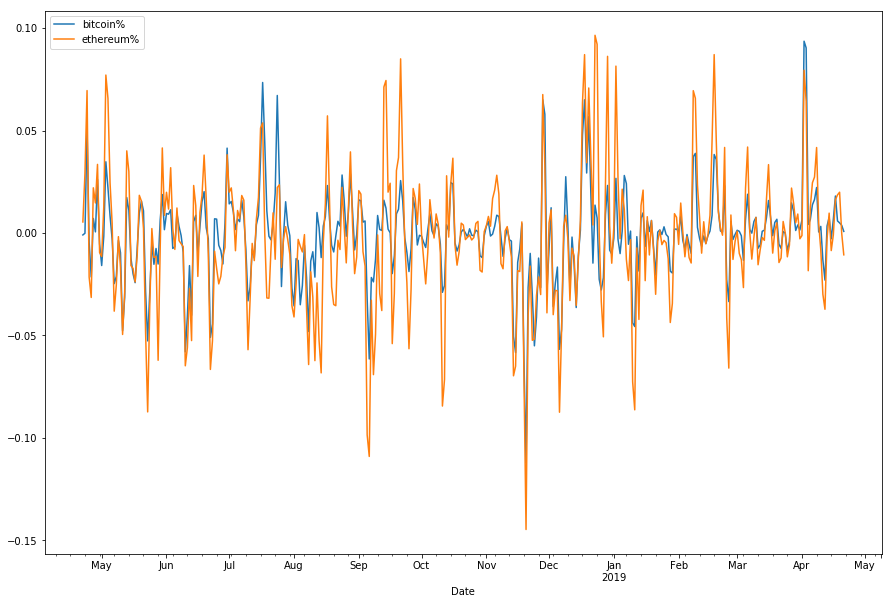

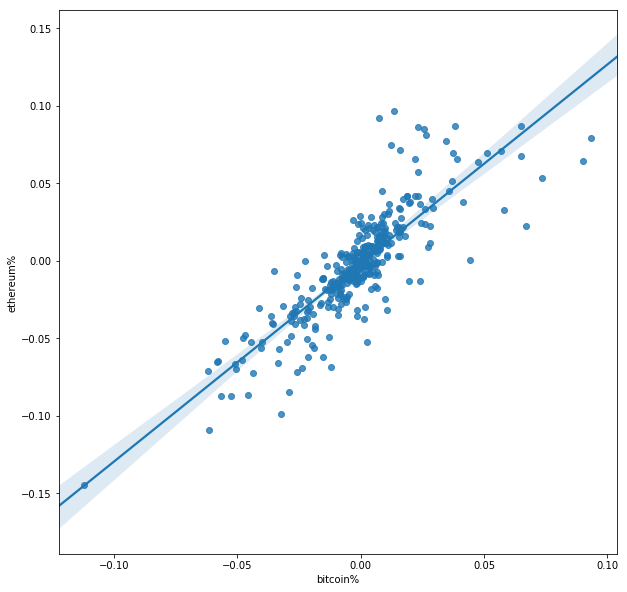

In [28]:
everything1(20180421, 20190421, "bitcoin", "ethereum")

# Ethereum ~ Bitcoin (3 Years)

           bitcoin%  ethereum%
bitcoin%   1.000000   0.466272
ethereum%  0.466272   1.000000
           bitcoin%  ethereum%
bitcoin%    1.00000    0.21741
ethereum%   0.21741    1.00000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     303.6
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           3.38e-60
Time:                        16:51:08   Log-Likelihood:                 2012.0
No. Observations:                1095   AIC:                            -4020.
Df Residuals:                    1093   BIC:                            -4010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      co

<Figure size 432x288 with 0 Axes>

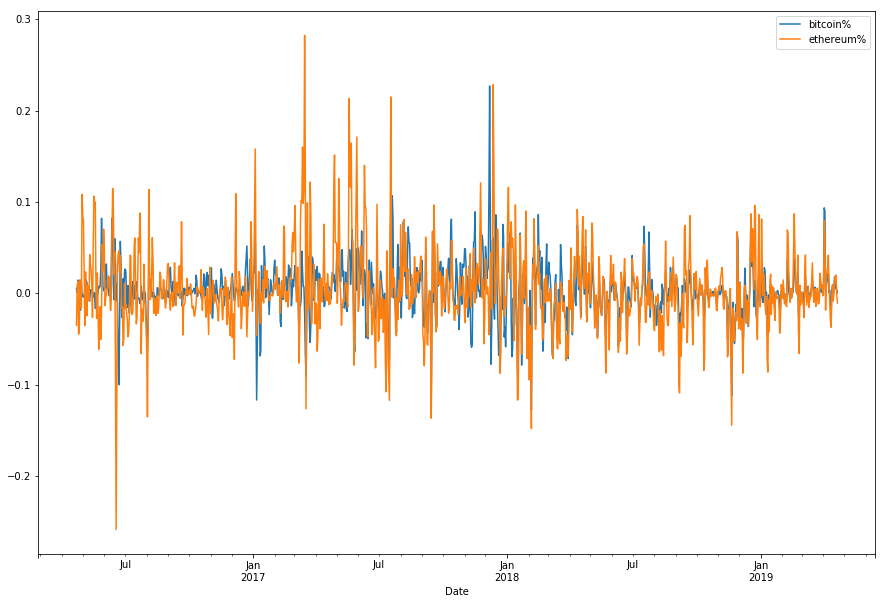

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


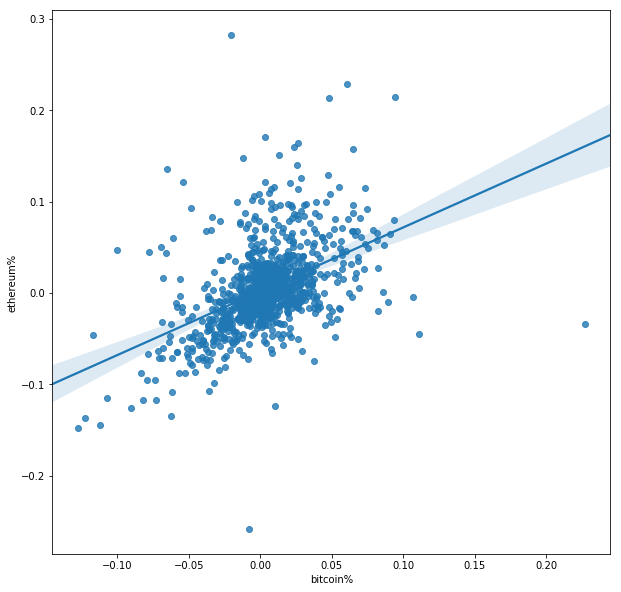

In [29]:
everything1(20160421, 20190421, "bitcoin", "ethereum")

# Ethereum ~ Bitcoin (August 7, 2015 to Date)

           bitcoin%  ethereum%
bitcoin%    1.00000    0.35483
ethereum%   0.35483    1.00000
           bitcoin%  ethereum%
bitcoin%   1.000000   0.125904
ethereum%  0.125904   1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     194.6
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.03e-41
Time:                        16:52:42   Log-Likelihood:                 2138.3
No. Observations:                1353   AIC:                            -4273.
Df Residuals:                    1351   BIC:                            -4262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      co

<Figure size 432x288 with 0 Axes>

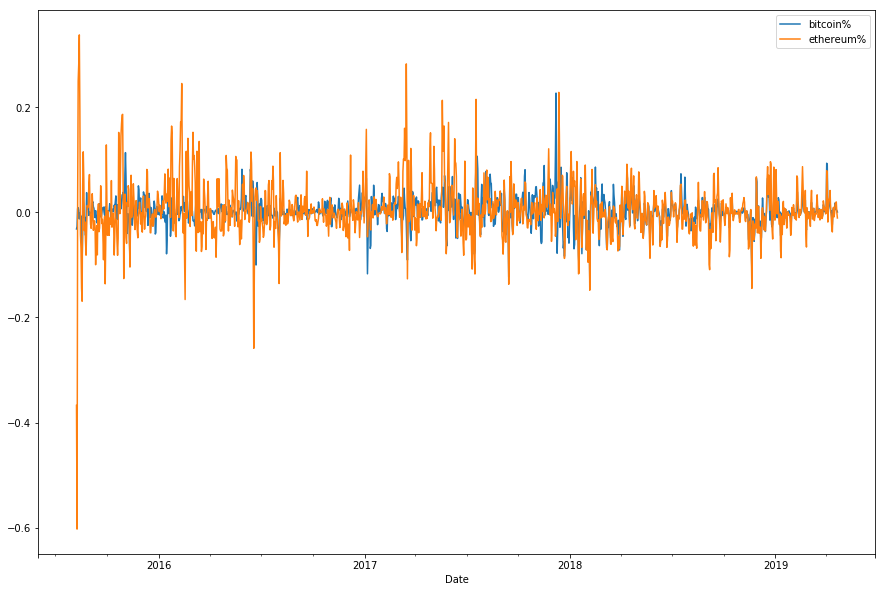

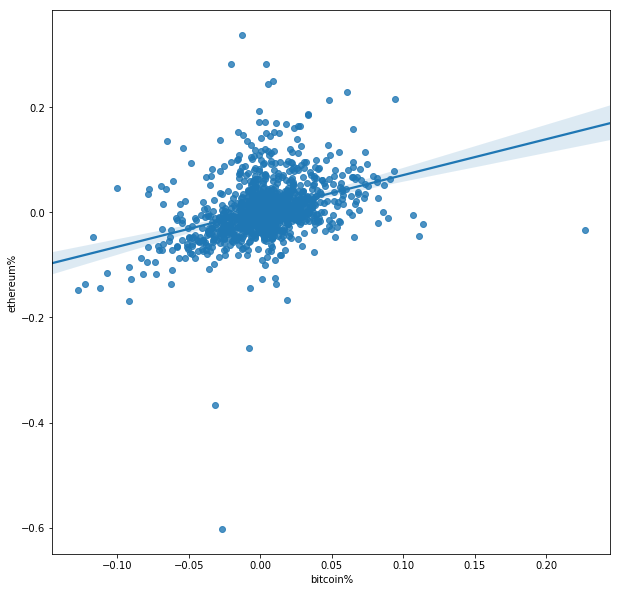

In [30]:
everything1(20150807, 20190421, "bitcoin", "ethereum")

# Ontology ~ Bitcoin (Year to Date)

           bitcoin%  ontology%
bitcoin%   1.000000   0.473876
ontology%  0.473876   1.000000
           bitcoin%  ontology%
bitcoin%   1.000000   0.224558
ontology%  0.224558   1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     31.28
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.70e-07
Time:                        16:54:20   Log-Likelihood:                 223.55
No. Observations:                 110   AIC:                            -443.1
Df Residuals:                     108   BIC:                            -437.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      co

<Figure size 432x288 with 0 Axes>

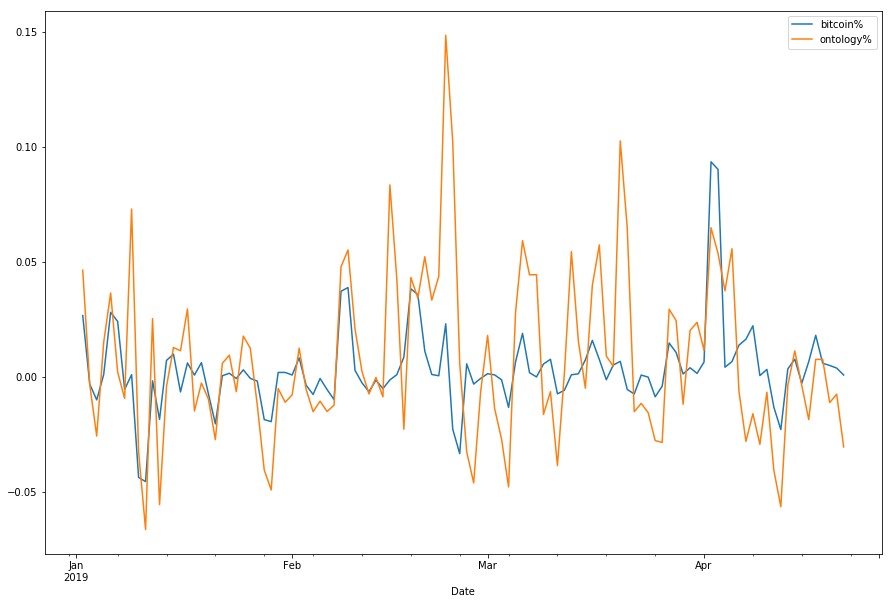

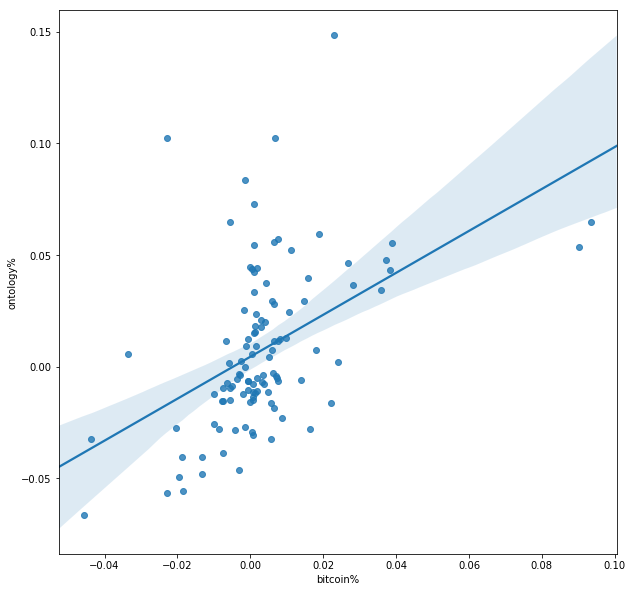

In [31]:
everything1(20190101, 20190421, "bitcoin", "ontology")

# Ontology ~ Bitcoin (March 8, 2018 to Date)

           bitcoin%  ontology%
bitcoin%    1.00000    0.45525
ontology%   0.45525    1.00000
           bitcoin%  ontology%
bitcoin%   1.000000   0.207253
ontology%  0.207253   1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     106.4
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.56e-22
Time:                        16:56:03   Log-Likelihood:                 609.91
No. Observations:                 409   AIC:                            -1216.
Df Residuals:                     407   BIC:                            -1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      co

<Figure size 432x288 with 0 Axes>

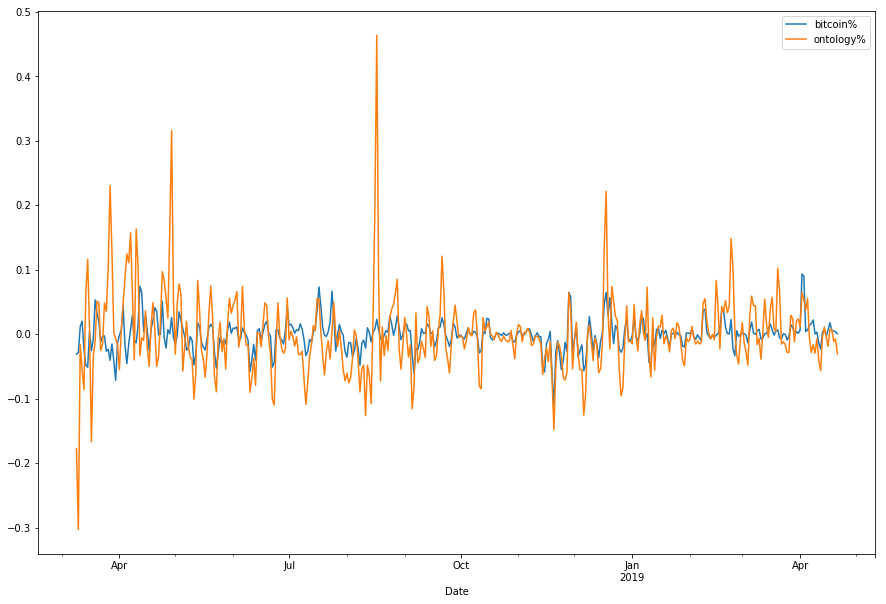

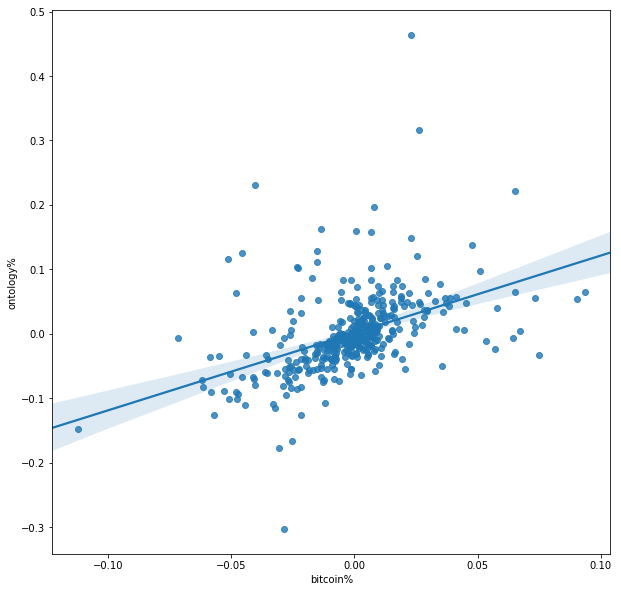

In [32]:
everything1(20180308, 20190421, "bitcoin", "ontology")

# VeChain ~ Bitcoin (Year to Date)

          bitcoin%  vechain%
bitcoin%  1.000000  0.681983
vechain%  0.681983  1.000000
          bitcoin%  vechain%
bitcoin%    1.0000    0.4651
vechain%    0.4651    1.0000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     93.91
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.36e-16
Time:                        16:57:12   Log-Likelihood:                 272.48
No. Observations:                 110   AIC:                            -541.0
Df Residuals:                     108   BIC:                            -535.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

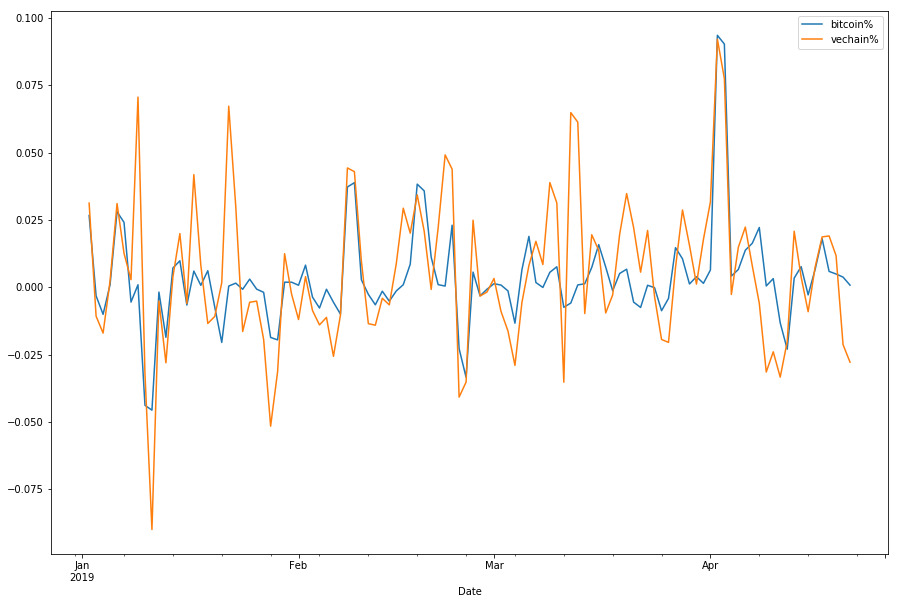

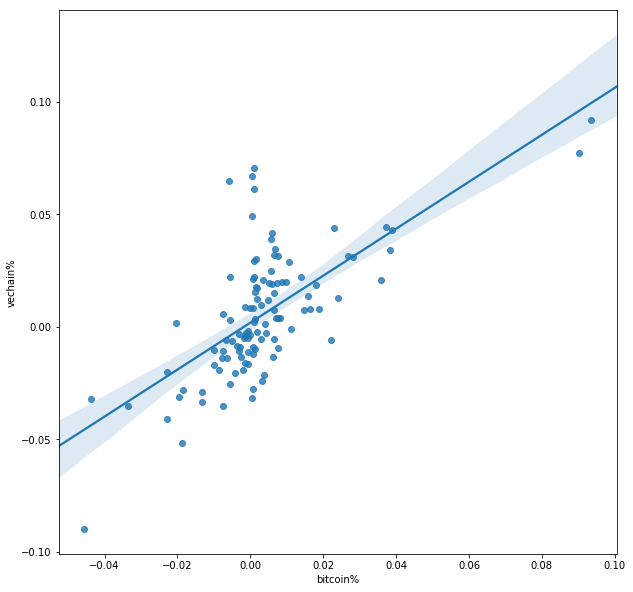

In [33]:
everything1(20190101, 20190421, "bitcoin", "vechain")

# Vechain ~ Bitcoin (August 3, 2018 to Date)

          bitcoin%  vechain%
bitcoin%   1.00000   0.69574
vechain%   0.69574   1.00000
          bitcoin%  vechain%
bitcoin%  1.000000  0.484054
vechain%  0.484054  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           4.29e-39
Time:                        16:58:30   Log-Likelihood:                 518.52
No. Observations:                 261   AIC:                            -1033.
Df Residuals:                     259   BIC:                            -1026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

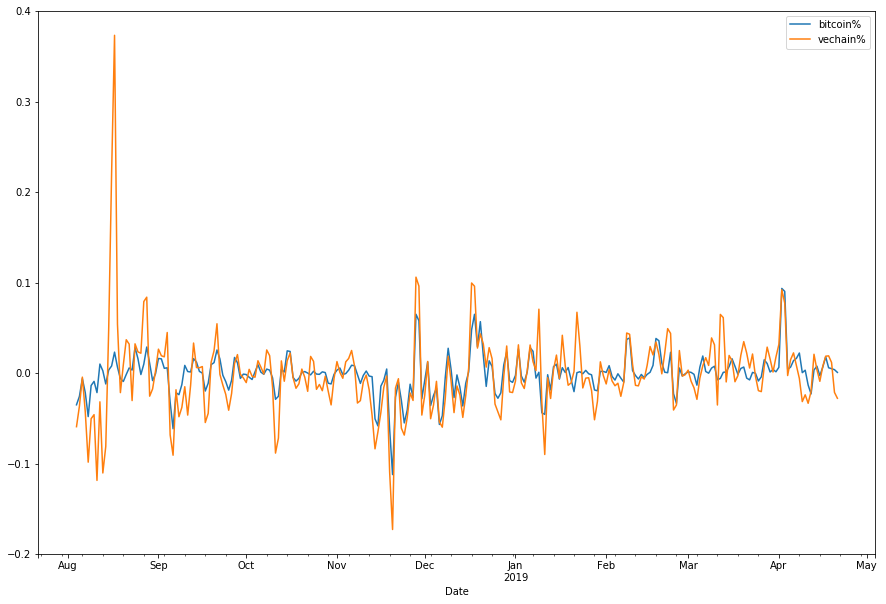

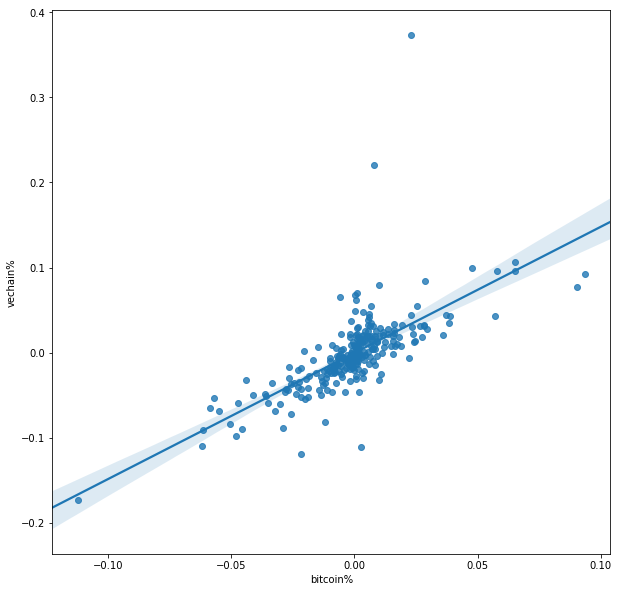

In [34]:
everything1(20180803, 20190421, "bitcoin", "vechain")

# Nano ~ Bitcoin (Year to Date)

          bitcoin%     nano%
bitcoin%  1.000000  0.729099
nano%     0.729099  1.000000
          bitcoin%     nano%
bitcoin%  1.000000  0.531585
nano%     0.531585  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     122.6
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.71e-19
Time:                        16:59:24   Log-Likelihood:                 263.99
No. Observations:                 110   AIC:                            -524.0
Df Residuals:                     108   BIC:                            -518.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

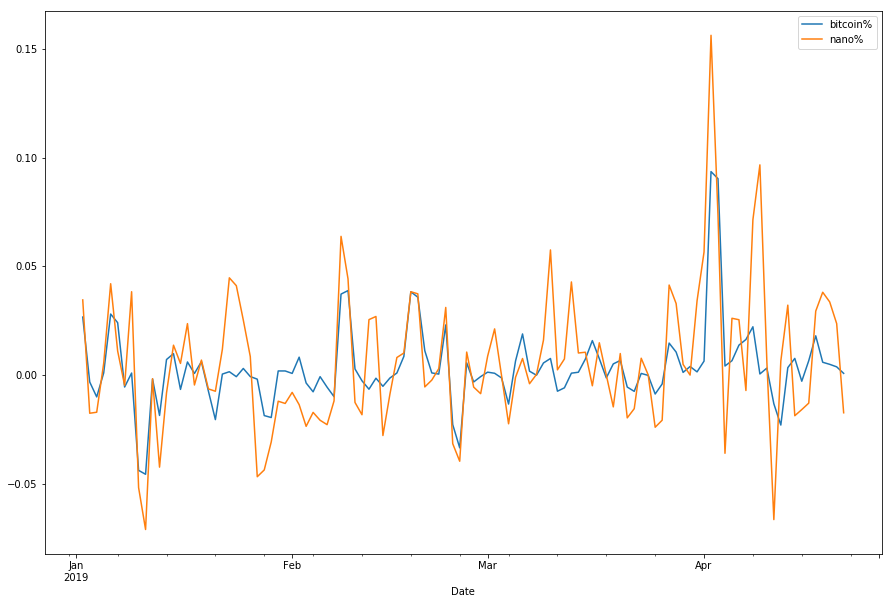

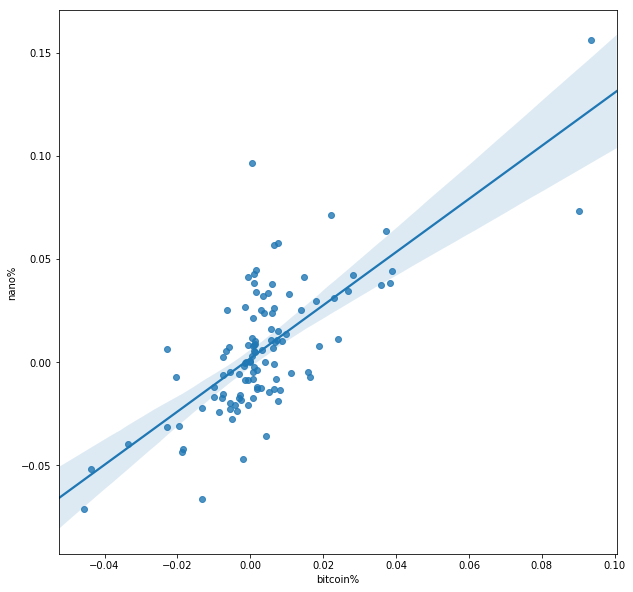

In [35]:
everything1(20190101, 20190421, "bitcoin", "nano")

# Nano ~ Bitcoin (1 Year)

          bitcoin%     nano%
bitcoin%  1.000000  0.682925
nano%     0.682925  1.000000
          bitcoin%     nano%
bitcoin%  1.000000  0.466386
nano%     0.466386  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     317.3
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.90e-51
Time:                        17:00:30   Log-Likelihood:                 702.47
No. Observations:                 365   AIC:                            -1401.
Df Residuals:                     363   BIC:                            -1393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

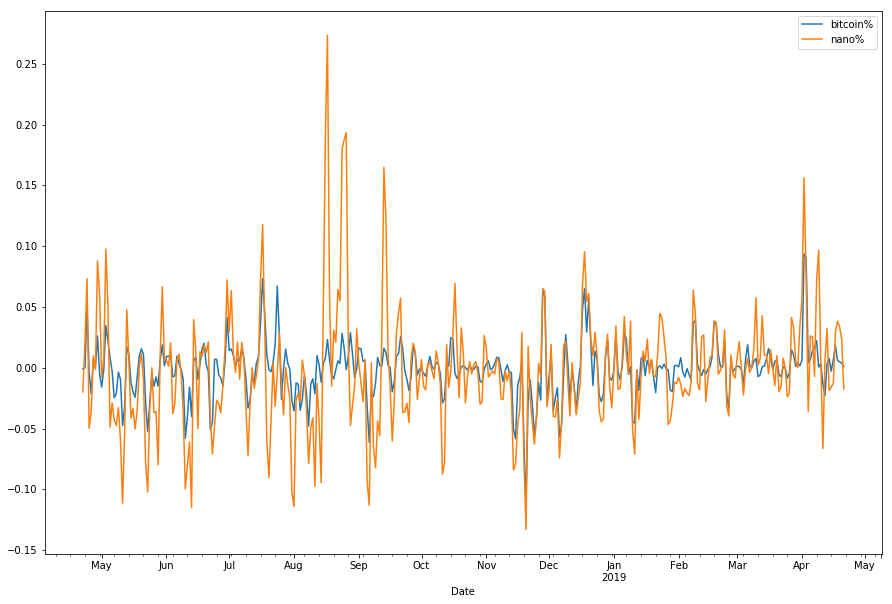

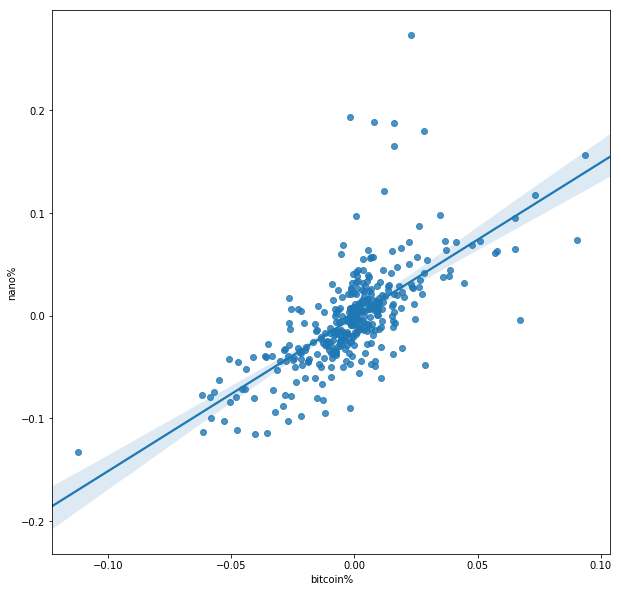

In [36]:
everything1(20180421, 20190421, "bitcoin", "nano")

# Nano ~ Bitcoin (March 6, 2017 to Date)

          bitcoin%     nano%
bitcoin%  1.000000  0.384218
nano%     0.384218  1.000000
          bitcoin%     nano%
bitcoin%  1.000000  0.147623
nano%     0.147623  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     131.3
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           3.83e-28
Time:                        17:02:12   Log-Likelihood:                 811.15
No. Observations:                 760   AIC:                            -1618.
Df Residuals:                     758   BIC:                            -1609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

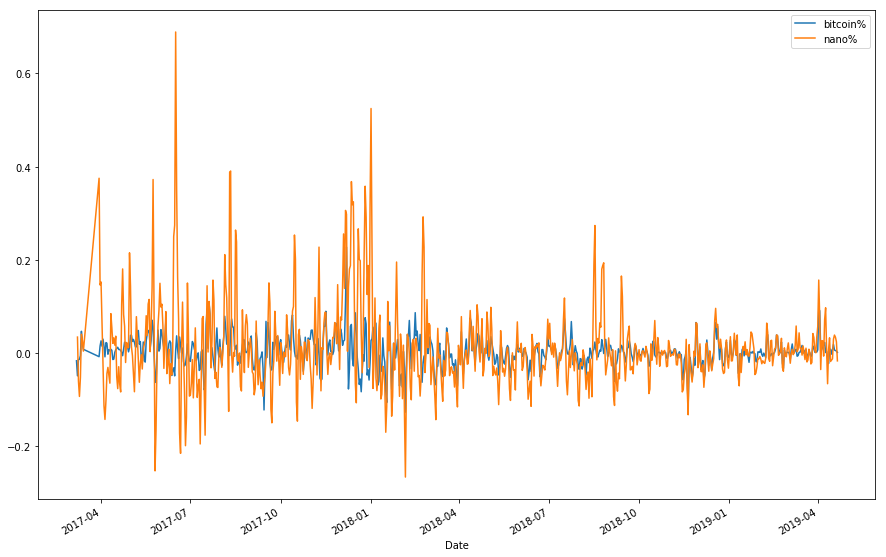

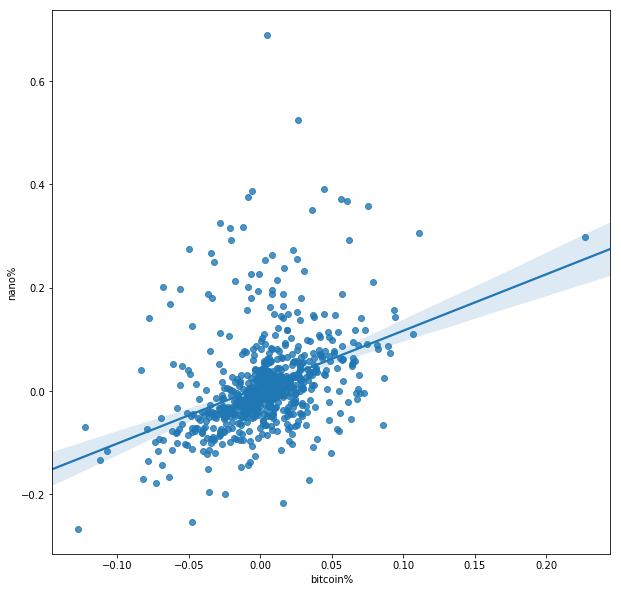

In [37]:
everything1(20170306, 20190421, "bitcoin", "nano")

# Decred ~ Bitcoin (Year to Date)

          bitcoin%  decred%
bitcoin%   1.00000  0.78131
decred%    0.78131  1.00000
          bitcoin%   decred%
bitcoin%  1.000000  0.610445
decred%   0.610445  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     169.2
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           7.58e-24
Time:                        17:03:37   Log-Likelihood:                 309.89
No. Observations:                 110   AIC:                            -615.8
Df Residuals:                     108   BIC:                            -610.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err  

<Figure size 432x288 with 0 Axes>

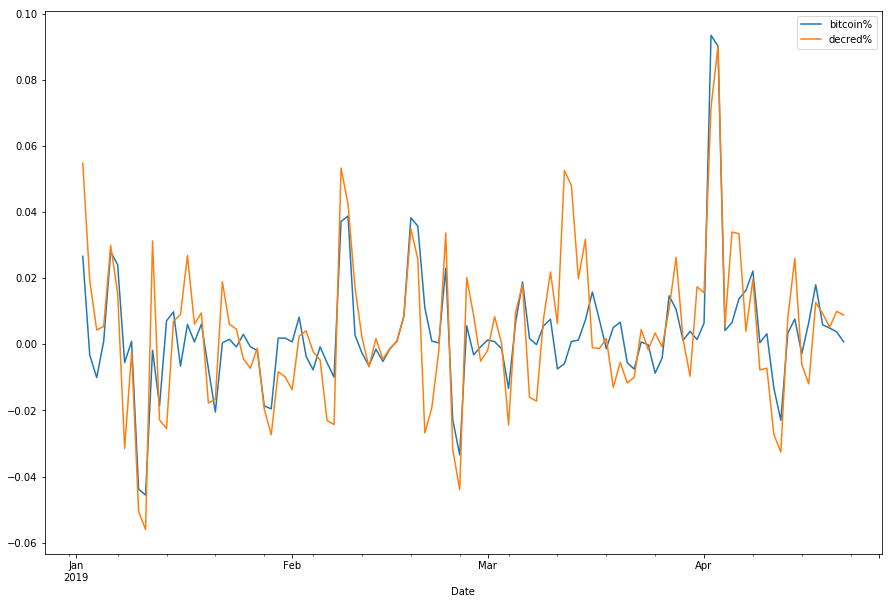

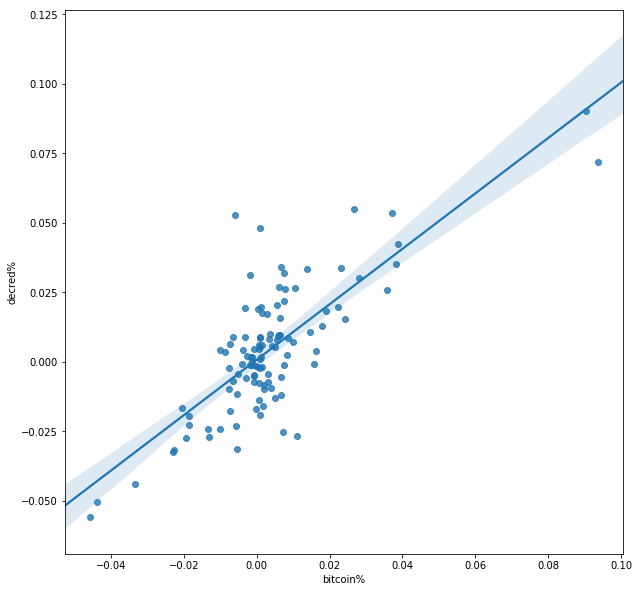

In [38]:
everything1(20190101, 20190421, "bitcoin", "decred")

# Decred ~ Bitcoin (1 Year)

          bitcoin%   decred%
bitcoin%  1.000000  0.693335
decred%   0.693335  1.000000
          bitcoin%   decred%
bitcoin%  1.000000  0.480713
decred%   0.480713  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     336.0
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.34e-53
Time:                        17:04:54   Log-Likelihood:                 820.58
No. Observations:                 365   AIC:                            -1637.
Df Residuals:                     363   BIC:                            -1629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

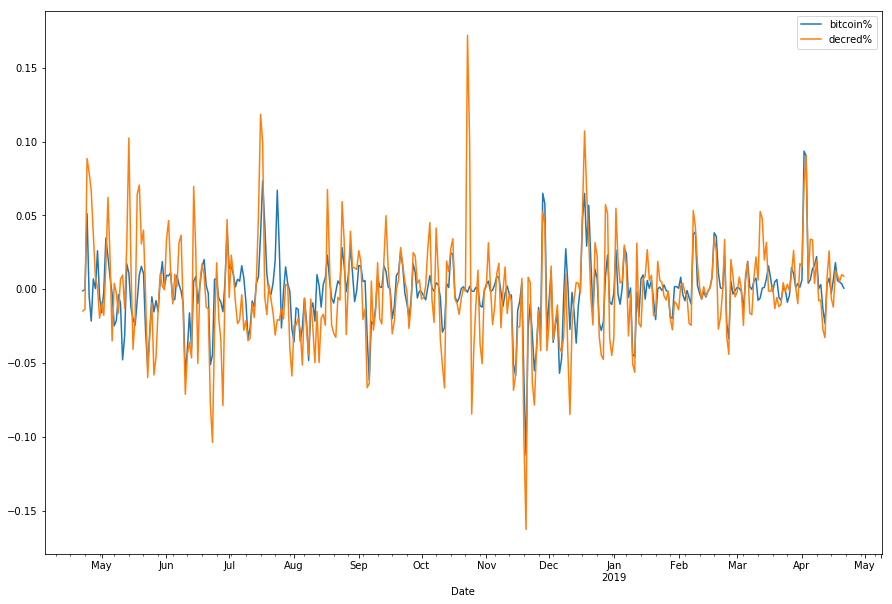

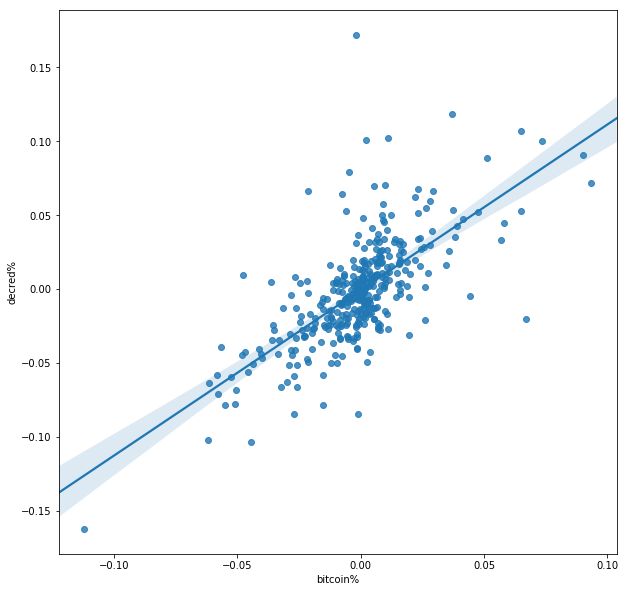

In [39]:
everything1(20180421, 20190421, "bitcoin", "decred")

# Decred ~ Bitcoin (3 Years)

          bitcoin%   decred%
bitcoin%  1.000000  0.365403
decred%   0.365403  1.000000
          bitcoin%  decred%
bitcoin%   1.00000  0.13352
decred%    0.13352  1.00000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     168.4
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           6.34e-36
Time:                        17:05:43   Log-Likelihood:                 1694.8
No. Observations:                1095   AIC:                            -3386.
Df Residuals:                    1093   BIC:                            -3376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err  

<Figure size 432x288 with 0 Axes>

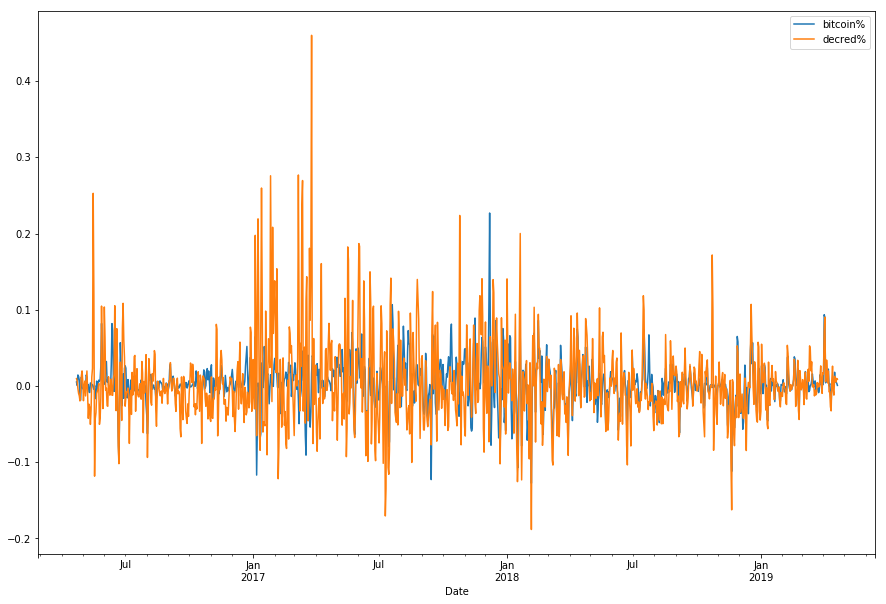

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


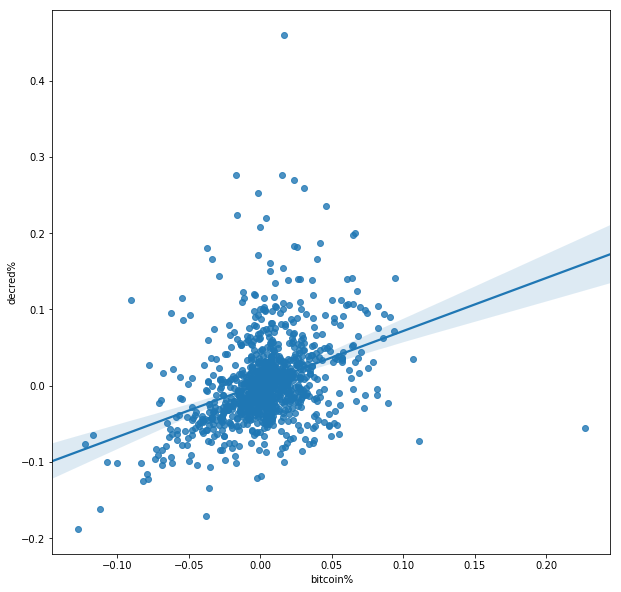

In [40]:
everything1(20160421, 20190421, "bitcoin", "decred")

# EOS ~ Bitcoin (Year to Date)

          bitcoin%      eos%
bitcoin%  1.000000  0.852096
eos%      0.852096  1.000000
          bitcoin%      eos%
bitcoin%  1.000000  0.726067
eos%      0.726067  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     286.3
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           3.85e-32
Time:                        17:06:49   Log-Likelihood:                 284.69
No. Observations:                 110   AIC:                            -565.4
Df Residuals:                     108   BIC:                            -560.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

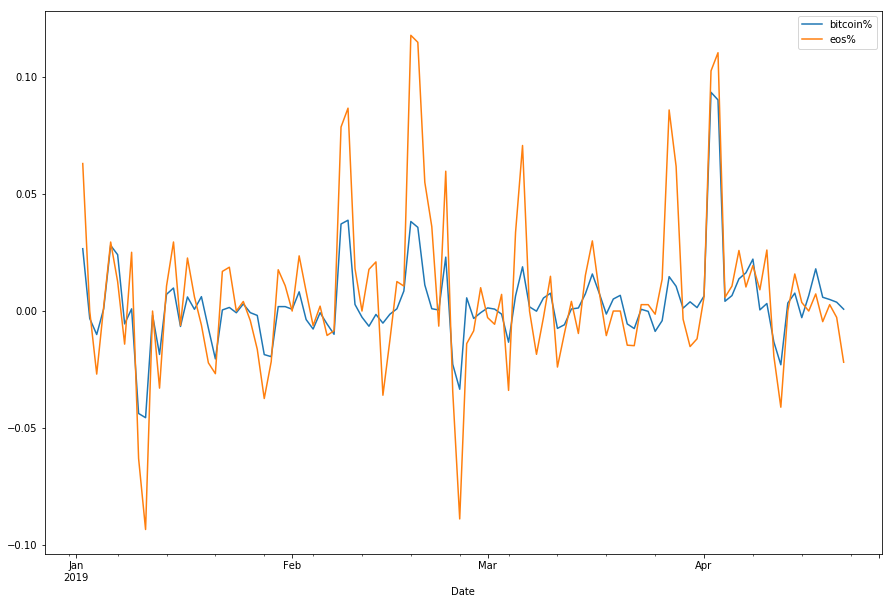

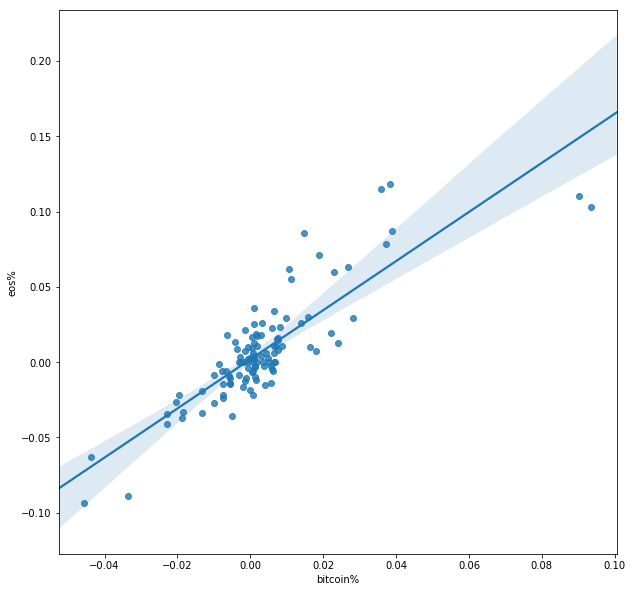

In [41]:
everything1(20190101, 20190421, "bitcoin", "eos")

# EOS ~ Bitcoin (1 Year)

          bitcoin%      eos%
bitcoin%  1.000000  0.771295
eos%      0.771295  1.000000
          bitcoin%      eos%
bitcoin%  1.000000  0.594896
eos%      0.594896  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     533.1
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           3.21e-73
Time:                        17:07:56   Log-Likelihood:                 795.91
No. Observations:                 365   AIC:                            -1588.
Df Residuals:                     363   BIC:                            -1580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

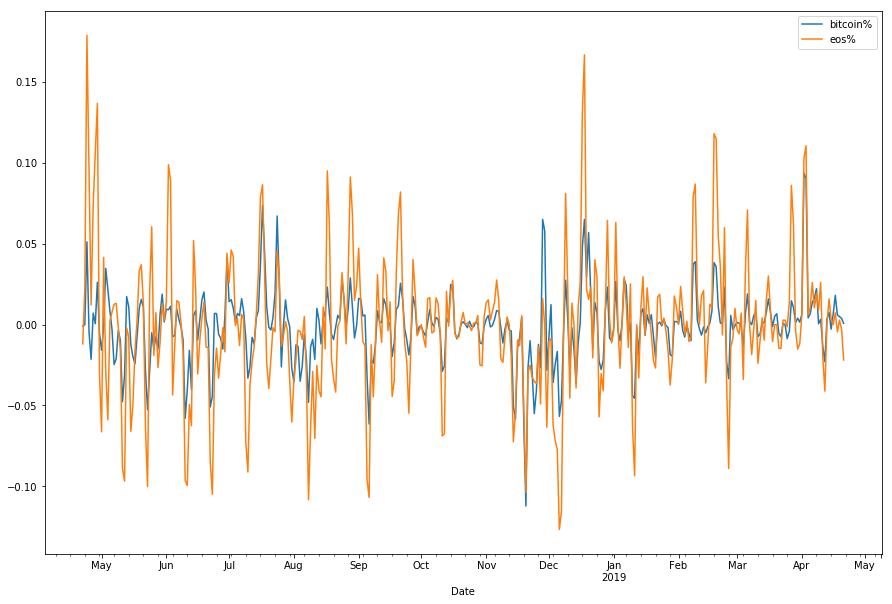

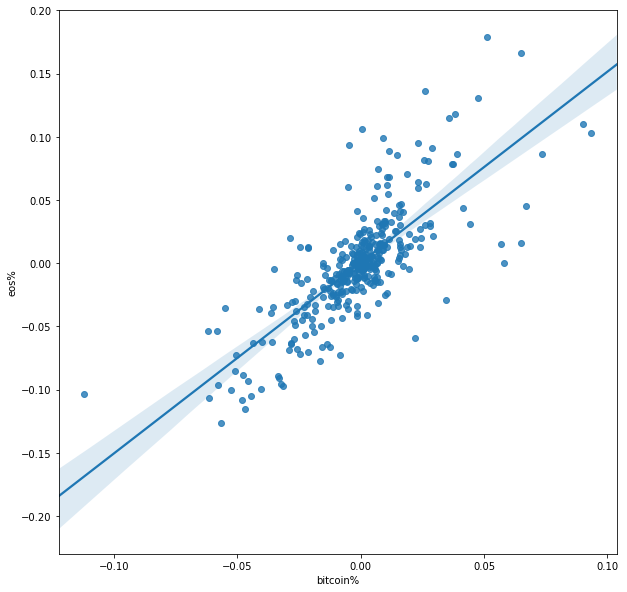

In [42]:
everything1(20180421, 20190421, "bitcoin", "eos")

# EOS ~ Bitcoin (July 1, 2017 to Date)

          bitcoin%      eos%
bitcoin%  1.000000  0.469207
eos%      0.469207  1.000000
          bitcoin%      eos%
bitcoin%  1.000000  0.220155
eos%      0.220155  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     185.5
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.21e-37
Time:                        17:08:59   Log-Likelihood:                 846.03
No. Observations:                 659   AIC:                            -1688.
Df Residuals:                     657   BIC:                            -1679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

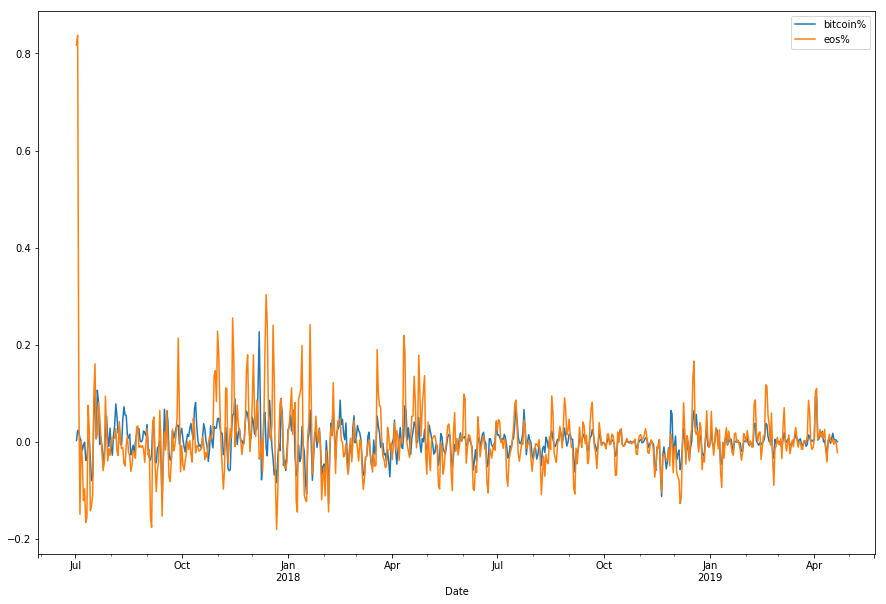

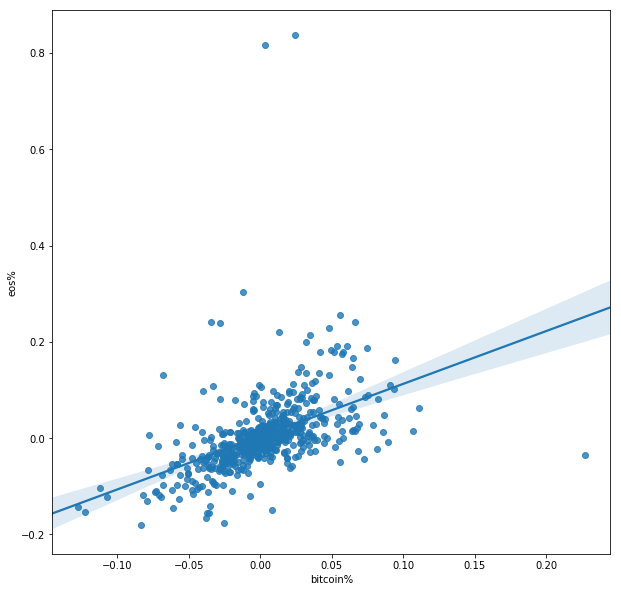

In [43]:
everything1(20170701, 20190421, "bitcoin", "eos")

# NEO ~ Bitcoin (Year to Date)

          bitcoin%      neo%
bitcoin%  1.000000  0.778159
neo%      0.778159  1.000000
          bitcoin%      neo%
bitcoin%  1.000000  0.605531
neo%      0.605531  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     165.8
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.50e-23
Time:                        17:09:59   Log-Likelihood:                 286.19
No. Observations:                 110   AIC:                            -568.4
Df Residuals:                     108   BIC:                            -563.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

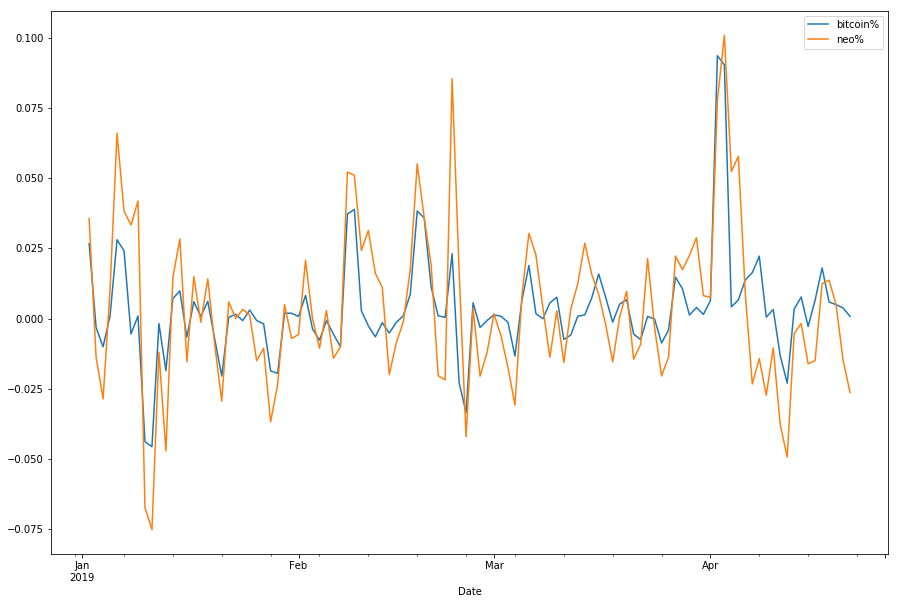

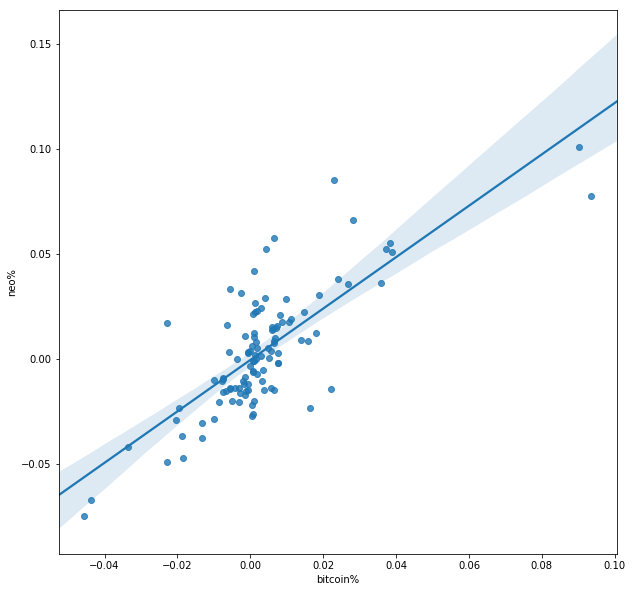

In [44]:
everything1(20190101, 20190421, "bitcoin", "neo")

# NEO ~ Bitcoin (1 Year)

          bitcoin%      neo%
bitcoin%  1.000000  0.796365
neo%      0.796365  1.000000
          bitcoin%      neo%
bitcoin%  1.000000  0.634198
neo%      0.634198  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     629.3
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.81e-81
Time:                        17:10:51   Log-Likelihood:                 859.81
No. Observations:                 365   AIC:                            -1716.
Df Residuals:                     363   BIC:                            -1708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

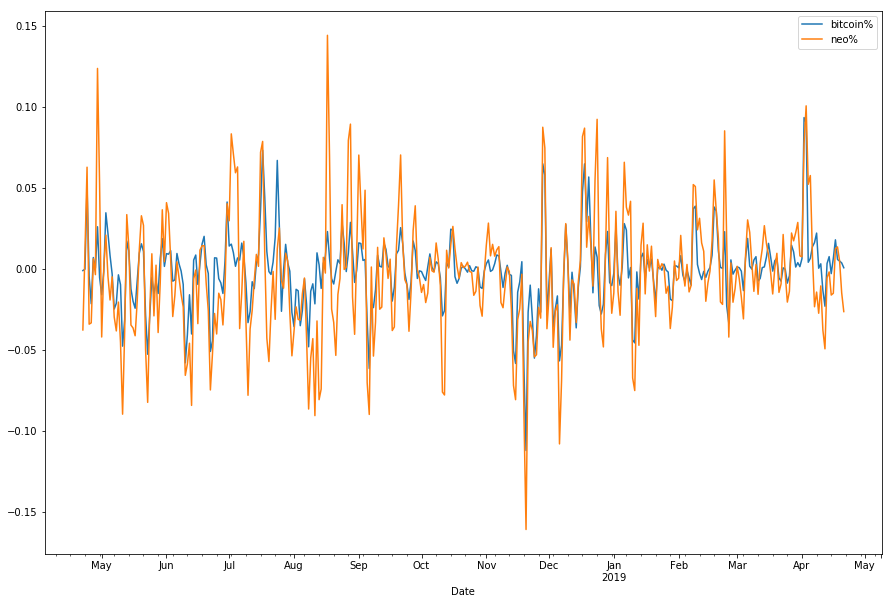

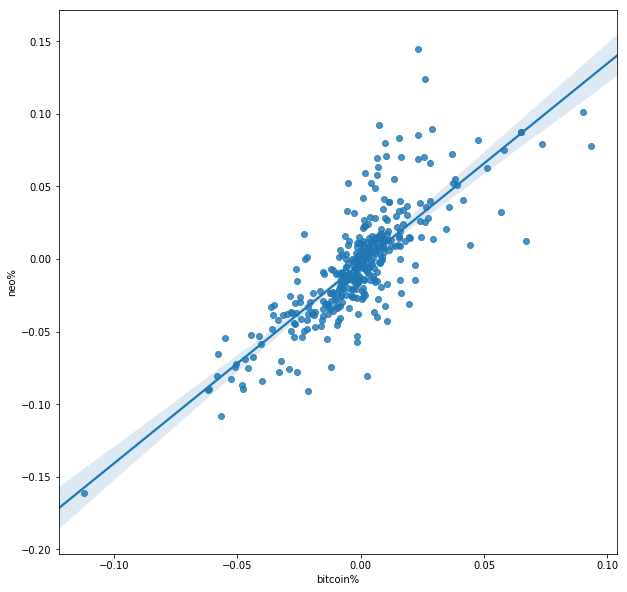

In [45]:
everything1(20180421, 20190421, "bitcoin", "neo")

# NEO ~ Bitcoin (September 8, 2016 to Date)

          bitcoin%      neo%
bitcoin%  1.000000  0.347775
neo%      0.347775  1.000000
          bitcoin%      neo%
bitcoin%  1.000000  0.120947
neo%      0.120947  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     131.0
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.66e-28
Time:                        17:12:24   Log-Likelihood:                 1160.2
No. Observations:                 954   AIC:                            -2316.
Df Residuals:                     952   BIC:                            -2307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

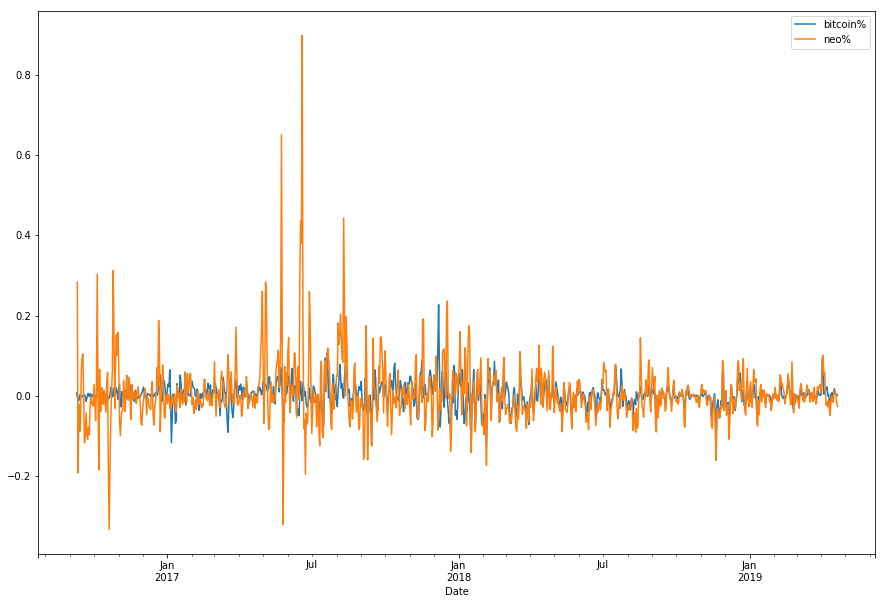

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


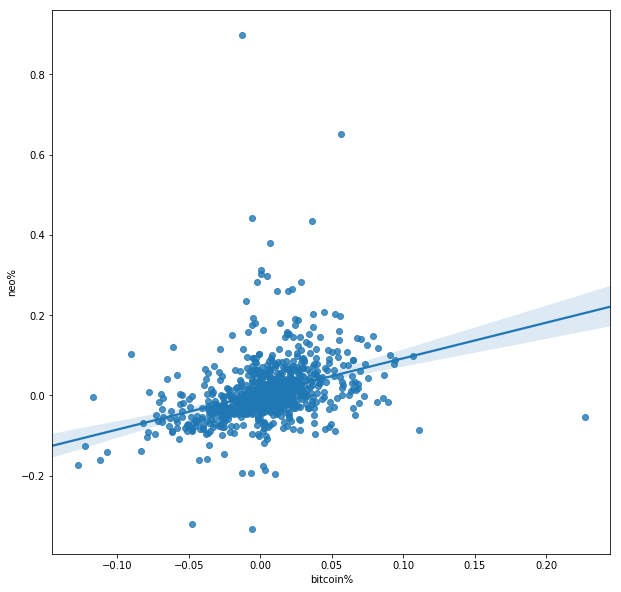

In [46]:
everything1(20160908, 20190421, "bitcoin", "neo")

# Icon ~ Bitcoin (Year to Date)

          bitcoin%     icon%
bitcoin%  1.000000  0.606626
icon%     0.606626  1.000000
          bitcoin%     icon%
bitcoin%  1.000000  0.367995
icon%     0.367995  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     62.88
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.16e-12
Time:                        17:13:03   Log-Likelihood:                 245.53
No. Observations:                 110   AIC:                            -487.1
Df Residuals:                     108   BIC:                            -481.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

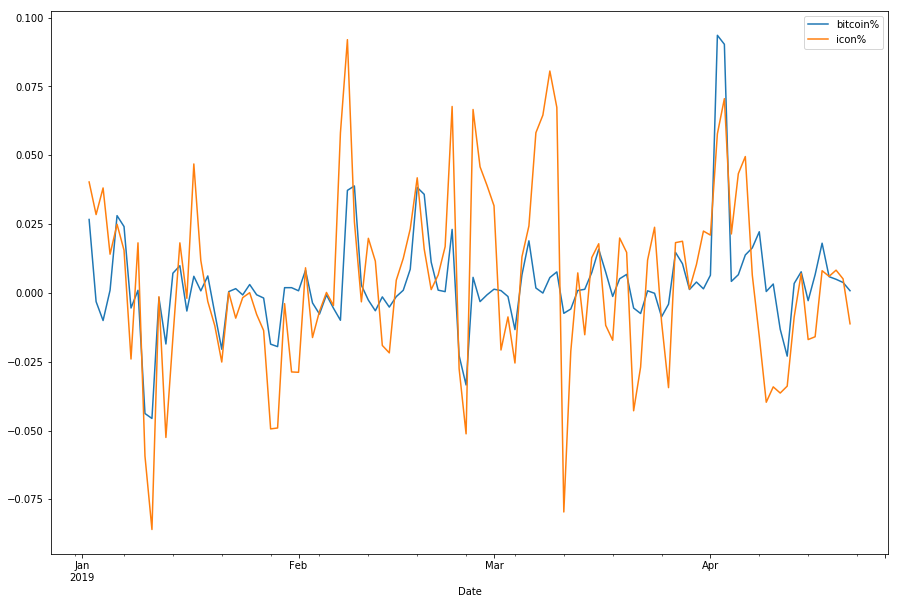

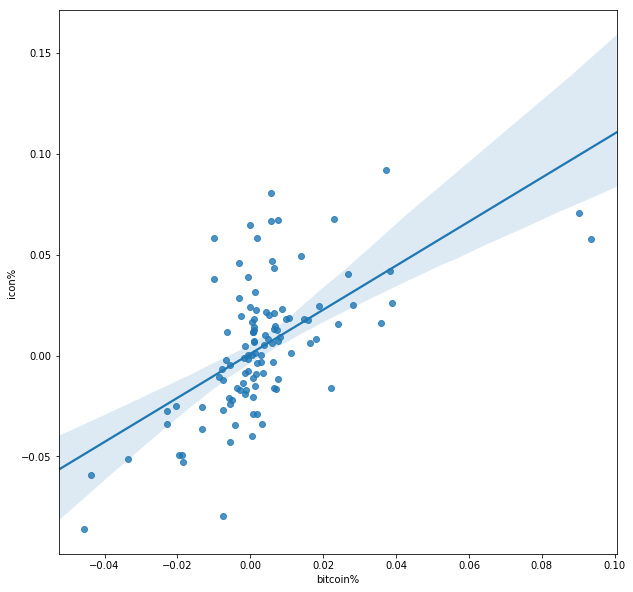

In [47]:
everything1(20190101, 20190421, "bitcoin", "icon")

# Icon ~ Bitcoin (1 Year)

          bitcoin%     icon%
bitcoin%  1.000000  0.727937
icon%     0.727937  1.000000
          bitcoin%     icon%
bitcoin%  1.000000  0.529893
icon%     0.529893  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     409.2
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.83e-61
Time:                        17:14:06   Log-Likelihood:                 759.59
No. Observations:                 365   AIC:                            -1515.
Df Residuals:                     363   BIC:                            -1507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

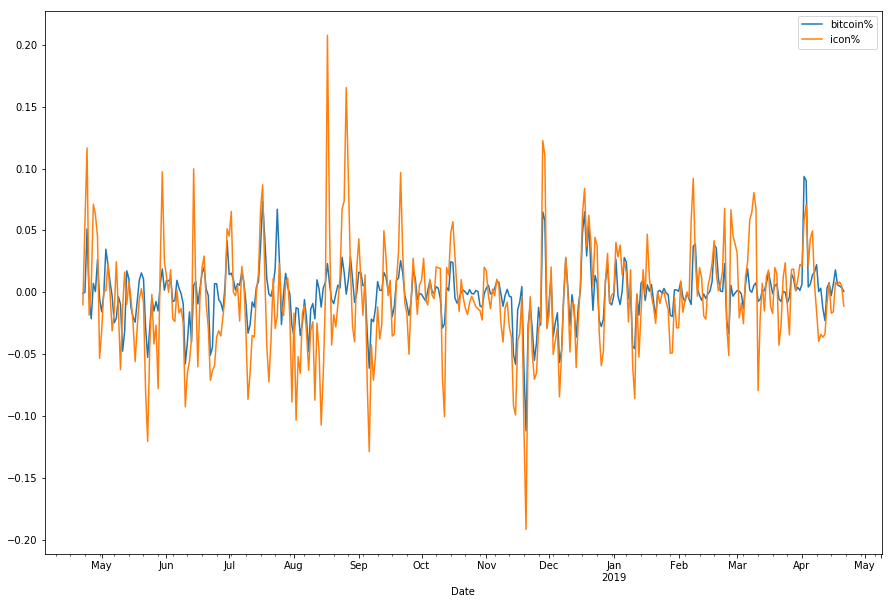

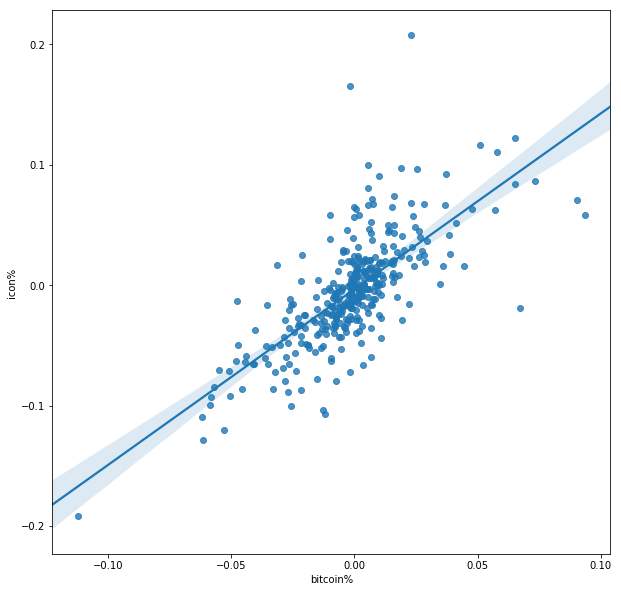

In [48]:
everything1(20180421, 20190421, "bitcoin", "icon")

# Icon ~ Bitcoin (October 26, 2017 to Date)

          bitcoin%     icon%
bitcoin%  1.000000  0.528981
icon%     0.528981  1.000000
          bitcoin%     icon%
bitcoin%  1.000000  0.279821
icon%     0.279821  1.000000
                            OLS Regression Results                            
Dep. Variable:        d[d.columns[1]]   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.46e-40
Time:                        17:15:20   Log-Likelihood:                 779.31
No. Observations:                 541   AIC:                            -1555.
Df Residuals:                     539   BIC:                            -1546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std er

<Figure size 432x288 with 0 Axes>

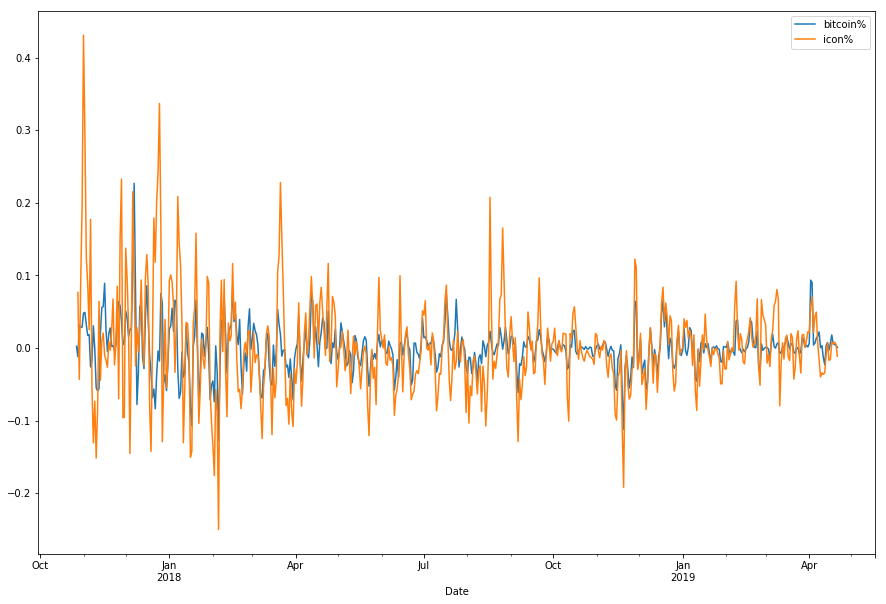

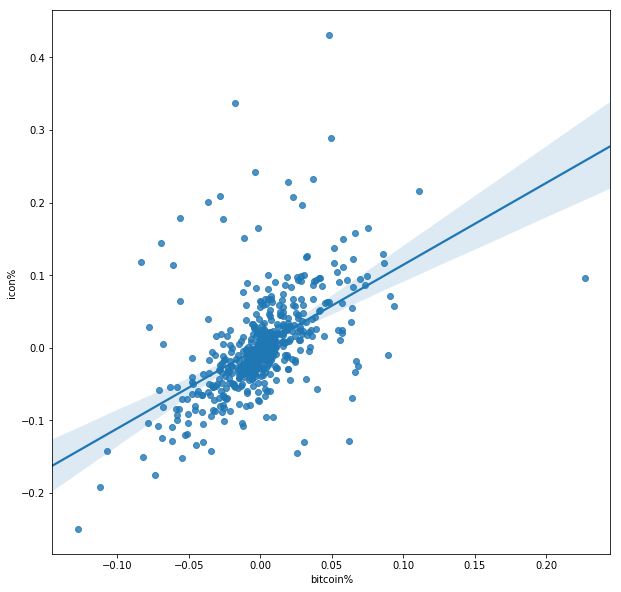

In [49]:
everything1(20171026, 20190421, "bitcoin", "icon")

# Looking at 9 Coins of Interest: Bitcoin, Ethereum, Ontology, Vechain, Nano, Decred, EOS, NEO, Icon

           bitcoin%  ethereum%  ontology%  vechain%     nano%   decred%  \
bitcoin%   1.000000   0.859784   0.473876  0.681983  0.729099  0.781310   
ethereum%  0.859784   1.000000   0.468865  0.637721  0.655482  0.750873   
ontology%  0.473876   0.468865   1.000000  0.563568  0.370159  0.393424   
vechain%   0.681983   0.637721   0.563568  1.000000  0.640685  0.694117   
nano%      0.729099   0.655482   0.370159  0.640685  1.000000  0.676924   
decred%    0.781310   0.750873   0.393424  0.694117  0.676924  1.000000   
eos%       0.852096   0.861508   0.507485  0.618089  0.638419  0.686650   
neo%       0.778159   0.718259   0.664069  0.659053  0.573678  0.672888   
icon%      0.606626   0.633095   0.450835  0.643517  0.486578  0.588613   

               eos%      neo%     icon%  
bitcoin%   0.852096  0.778159  0.606626  
ethereum%  0.861508  0.718259  0.633095  
ontology%  0.507485  0.664069  0.450835  
vechain%   0.618089  0.659053  0.643517  
nano%      0.638419  0.573678  0.486578

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


<Figure size 432x288 with 0 Axes>

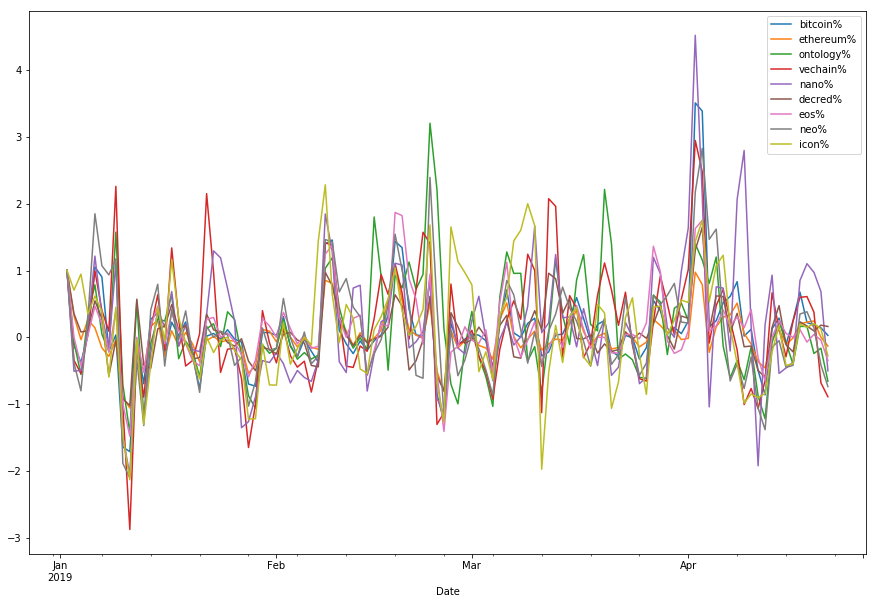

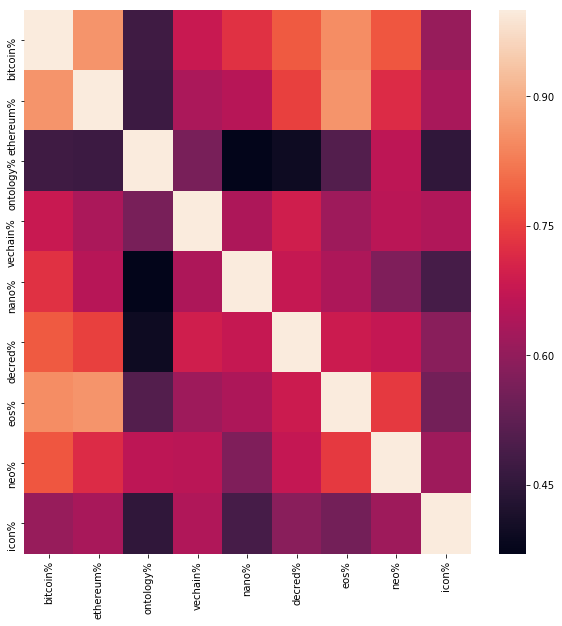

In [50]:
everything1(20190101, 20190421, "bitcoin", "ethereum", "ontology", "vechain", "nano", "decred", "eos", "neo", "icon")